# Section 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

# Q8

In [2]:
def Var_result(asstmix,portfolio_value,weights,dayofVar,confidence_level):

    adj_close_df = pd.DataFrame()
    for ticker in asstmix:
        endDate = dt.datetime.now()
        years=15
        startDate = endDate - dt.timedelta(days=365*years)
        data = yf.download(ticker, start=startDate, end=endDate)
        adj_close_df[ticker] = data['Adj Close']

    log_returns = np.log(adj_close_df / adj_close_df.shift(1))
    log_returns = log_returns.dropna()

    historical_returns = (log_returns * weights).sum(axis =1)

    range_returns = historical_returns.rolling(window = dayofVar).sum()
    range_returns = range_returns.dropna()

    VaR = -np.percentile(range_returns, 100 - (confidence_level * 100))*portfolio_value

    return_window = dayofVar
    range_returns = historical_returns.rolling(window=return_window).sum()
    range_returns = range_returns.dropna()
        
    range_returns_dollar = range_returns * portfolio_value
        
    plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
    plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
    plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_level:.0%} confidence level')
    plt.legend()
    plt.show()

    return VaR

In [3]:
# set patameters 

assetmix= ['SPY','GLD','BND']
portfolio_value=1000000
dayofVar=1
confidence_level=0.99
  #assume equal weights
weights=np.array([1/len(assetmix)]*len(assetmix))
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


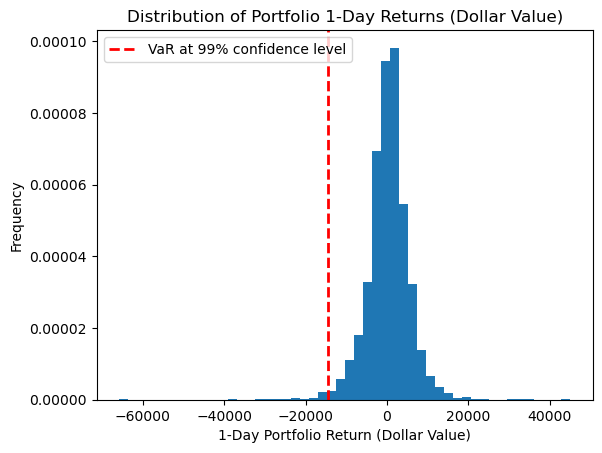

14538.143021213868

In [4]:
#result
Var_result(assetmix, portfolio_value, weights, dayofVar, confidence_level)

In [5]:
def incremental_VaR(Var1,Var2):
    return Var2-Var1

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


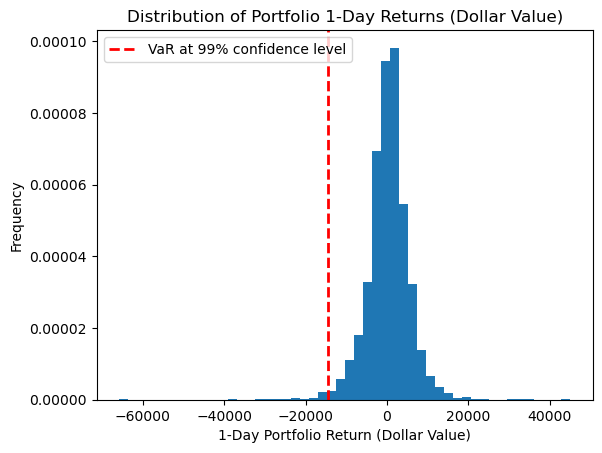

In [6]:
Var1=Var_result(['SPY','GLD','BND'],portfolio_value,weights,dayofVar,confidence_level)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


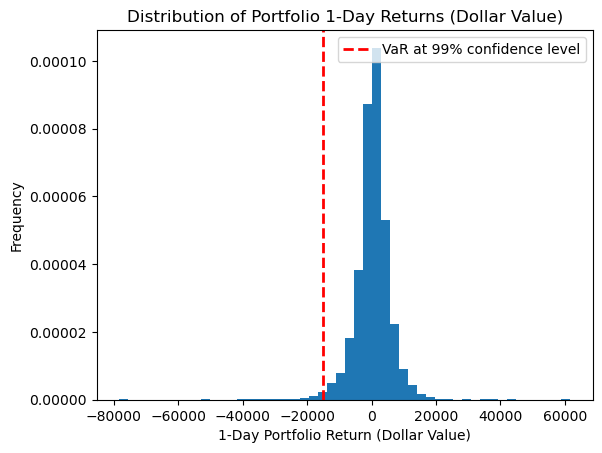

In [7]:
wights = np.array([1/2]*2)
Var2 =Var_result(['SPY','BND'],portfolio_value,wights,dayofVar,confidence_level)

In [8]:
incremental_VaR(Var1,Var2)

537.4685146334377